### ARIMA(p, d, q) and Time Series Forecasting

Foundations & Techniques

### Lesson Overview

 - Foundational Concepts:
   - Autocovariance, Autocorrelation
   - Stationarity, Differencing
 - AR(p) & MA(q) processes
 - Fitting models, making forecasts
 - Predict the price of MSFT stock!
 - Follow up concepts:
  - Seasonality
  - Model fitting
  - Cross Validation with ARIMA models

### Basic Idea

ARIMA models are used to make predictions about upcoming values *as a function of the passage of time*.

Where typical predictive models measure how some target value changes with respect to some other variable, ARIMA models measure how some variable change with respect to time differences at previous states.

In their traditional form, they're *univariate* models.

### Why Time Series Forecasting?

For a certain class of problems, ARIMA(p, d, q) and similar methods still outperform other techniques for making accurate forecasts.  

A fairly recent study that garnered a lot of attention:  https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0194889

Less technical interpretation:  https://machinelearningmastery.com/findings-comparing-classical-and-machine-learning-methods-for-time-series-forecasting/

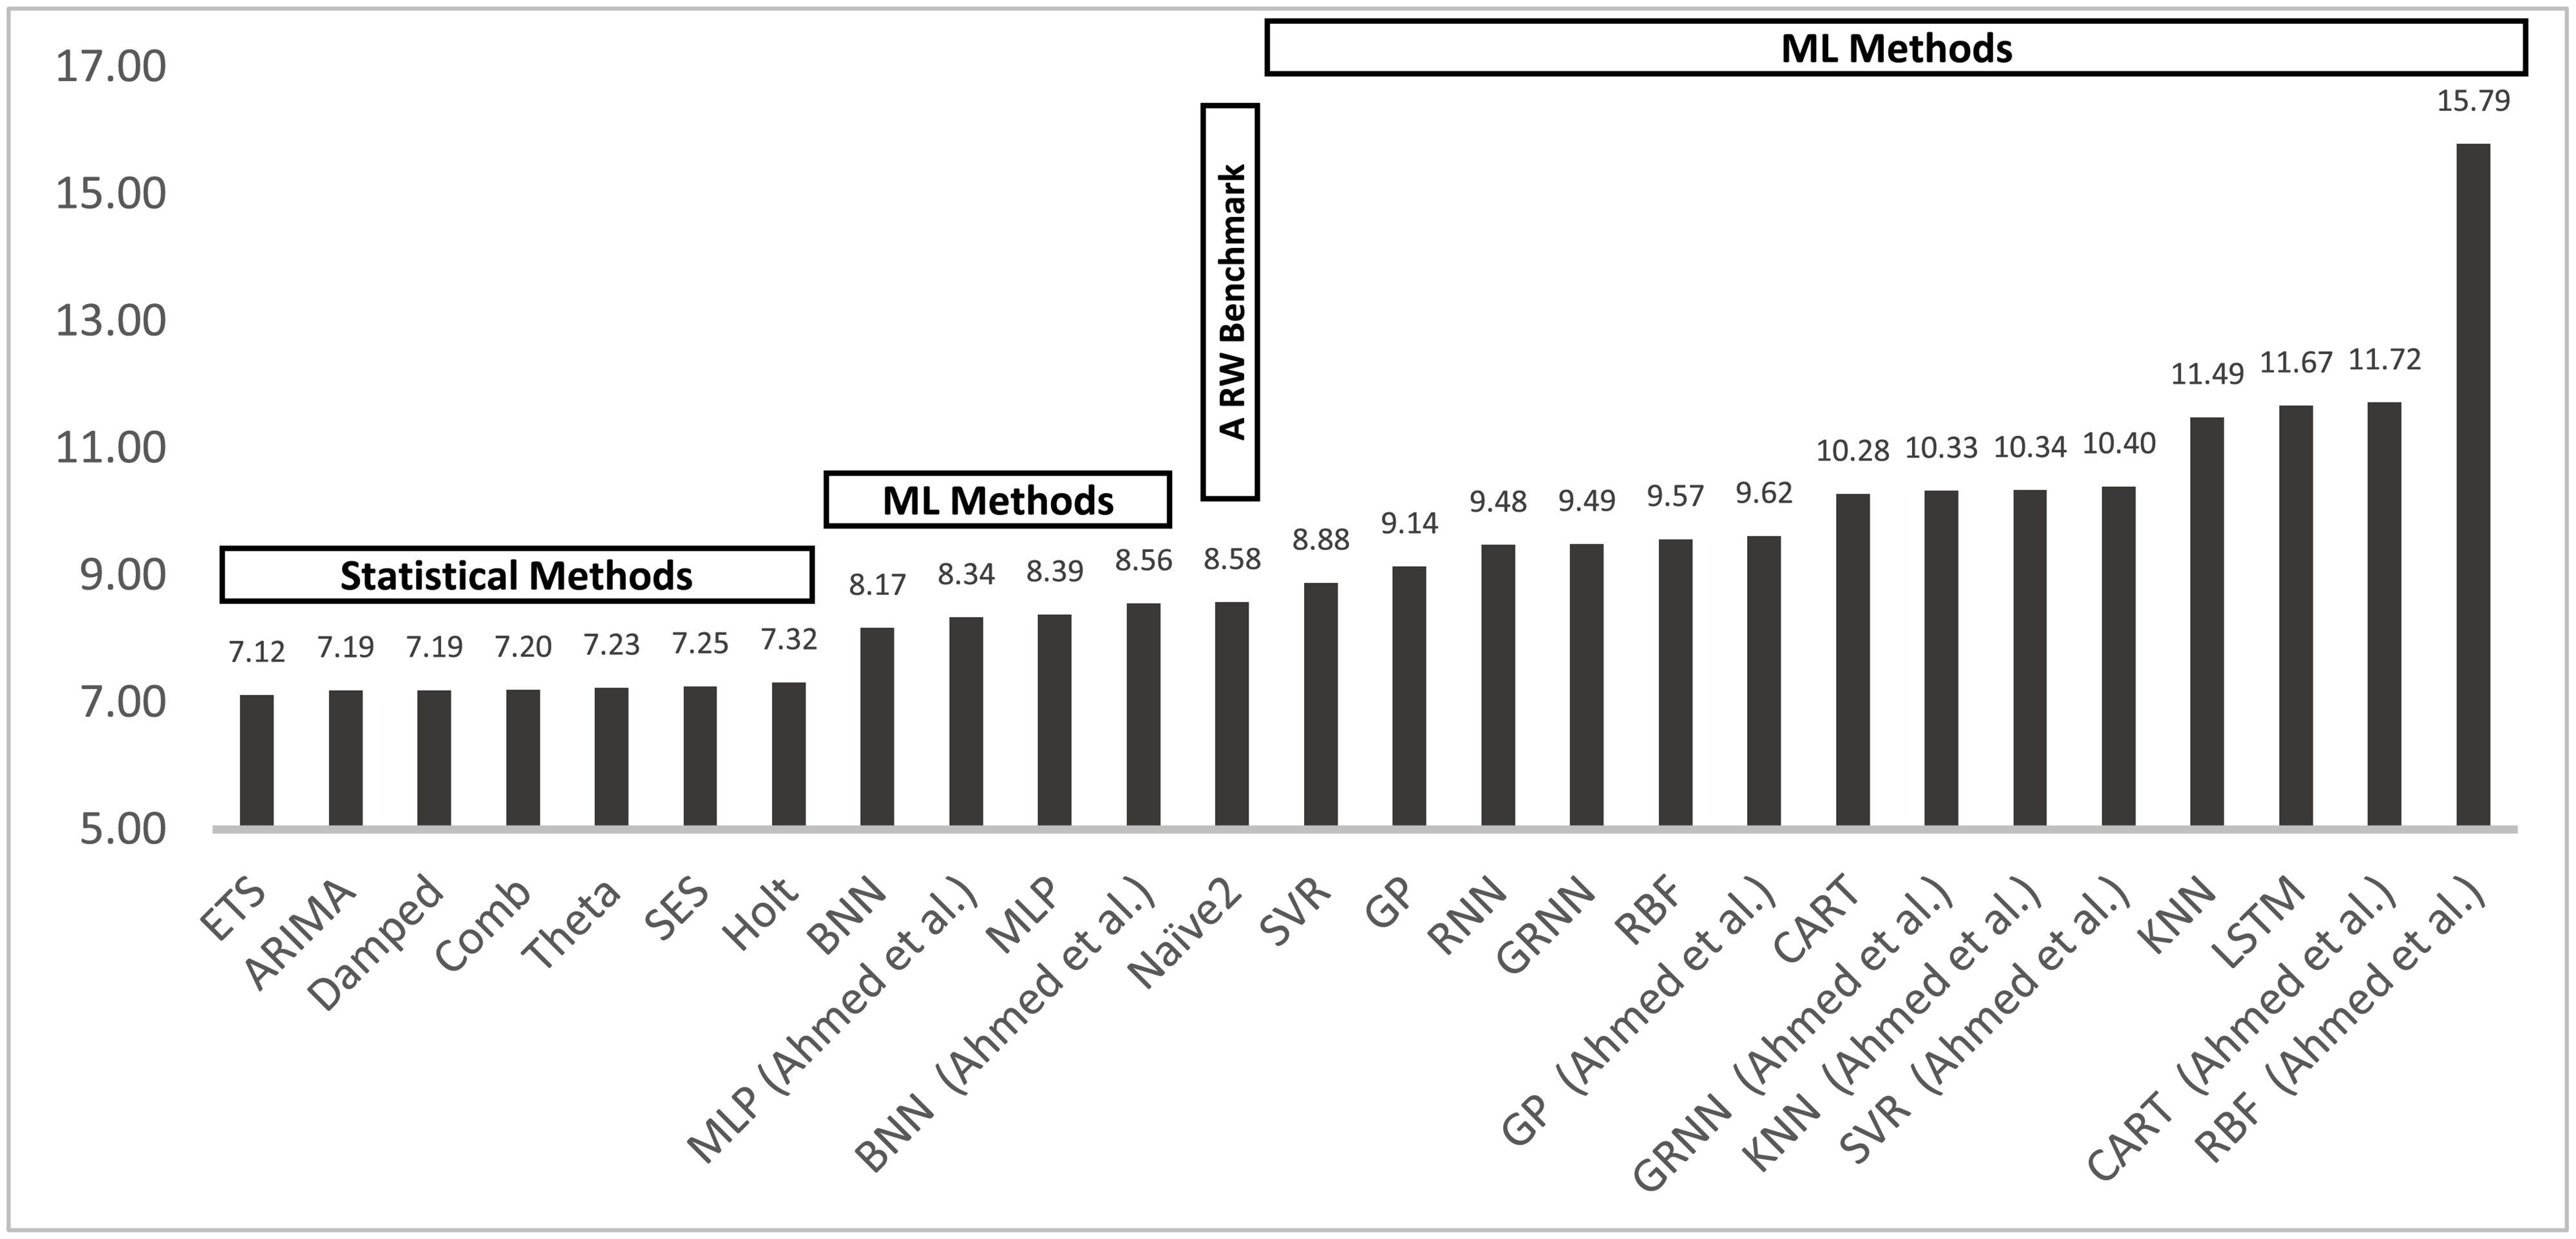

In [1]:
from IPython.display import Image
Image(filename='assets/comparison.png')

### What Sorts of Problems Can A Time Series Forecast Solve?

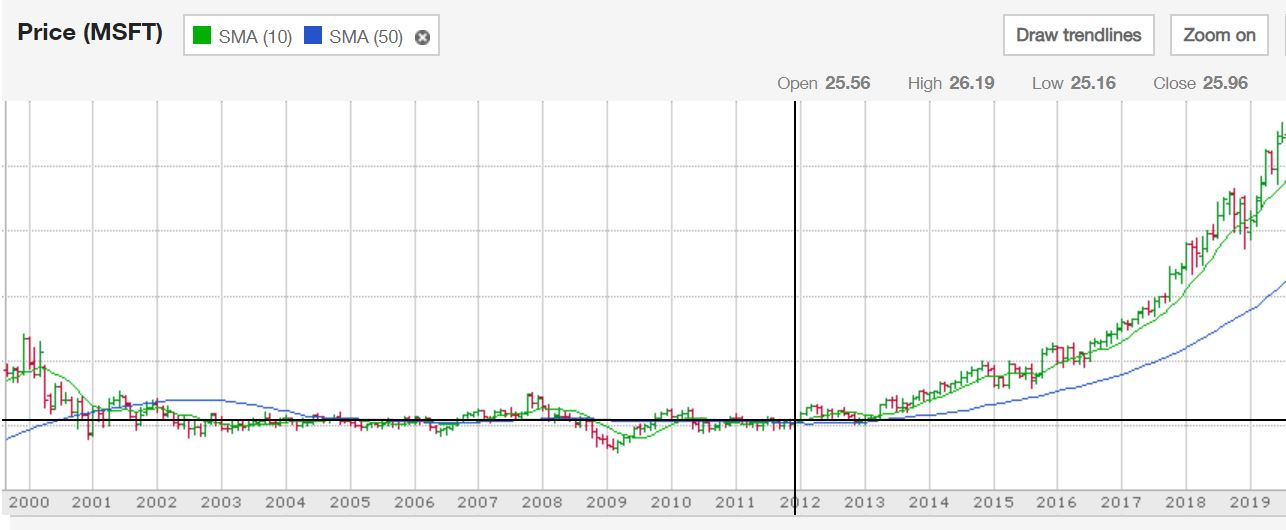

In [2]:
Image(filename='assets/msft_stock.jpg')

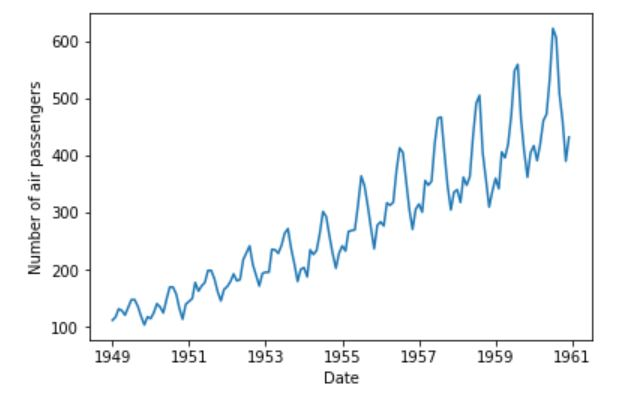

In [3]:
Image(filename='assets/air-passengers.jpg')

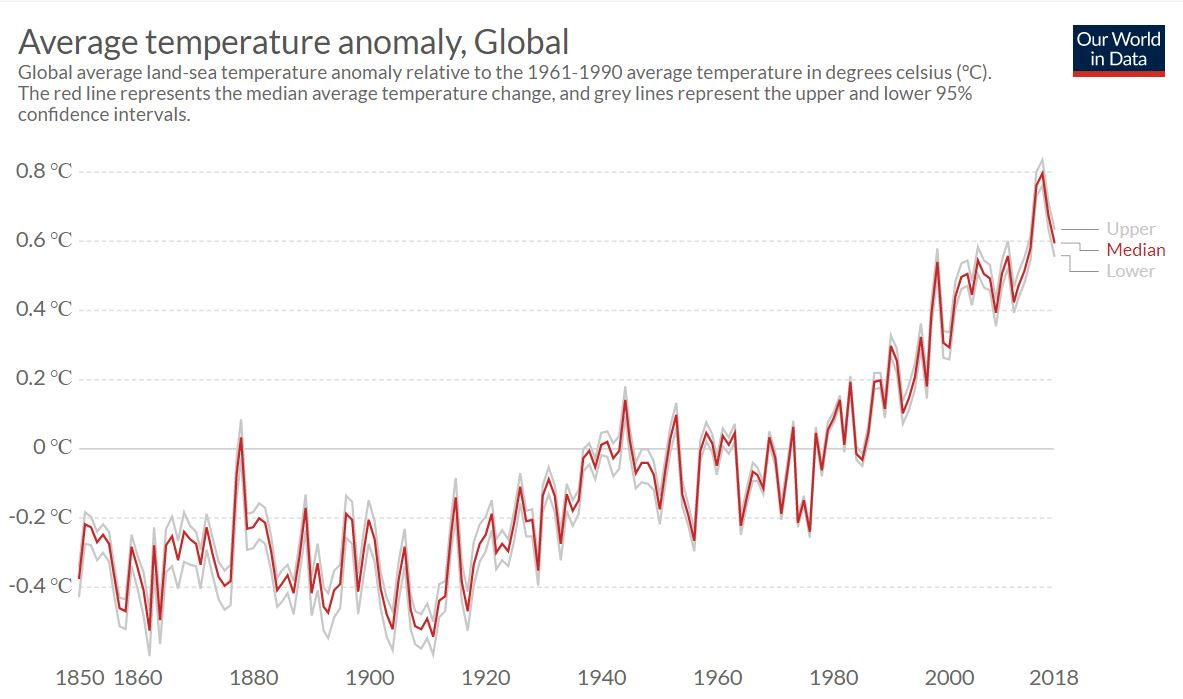

In [4]:
Image(filename='assets/co2.jpg')

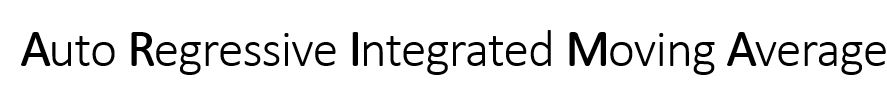

In [5]:
Image(filename='assets/ARIMA.jpg')

### Autocovariance, Autocorrelation

 - The basis for deriving most of the other information from an ARIMA model
 - Similar to their non time-series counterparts:  Covariance and correlation.
 - Used to both fit models, as well as generate the values to use for p and q

$$ \frac{1}{N - 1}\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})$$

**Covariance:**  Measures the linear dependence one variable has with respect to another.  

Ie, if samples of X and Y are simultaneously larger or smaller than their average value, the covariance will go up.

**Autocovariance:**  Measures the linear dependence a time series has with *with respect to itself* at a different lag in time.

$$ \frac{1}{N}  \sum_{t=1}^n (x_{t} - \bar{x})(x_{t+k} - \bar{x}) $$

### Example:  What Is The Autocovariance of the Births Dataset at Lag 1?

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('data/births.csv', index_col='Date', parse_dates=True)
df.head()

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

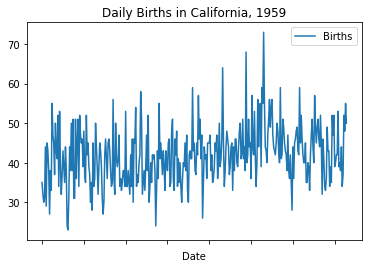

In [19]:
df.plot(title='Daily Births in California, 1959');

In [10]:
X_t = df[:-1]['Births'] - df['Births'].mean()
X_t.head()

Date
1959-01-01    -6.980822
1959-01-02    -9.980822
1959-01-03   -11.980822
1959-01-04   -10.980822
1959-01-05     2.019178
Name: Births, dtype: float64

In [11]:
X_t_one = df[1:]['Births'] - df['Births'].mean()
X_t_one.head()

Date
1959-01-02    -9.980822
1959-01-03   -11.980822
1959-01-04   -10.980822
1959-01-05     2.019178
1959-01-06   -12.980822
Name: Births, dtype: float64

In [12]:
X_covar = X_t.values * X_t_one.values
X_covar

array([ 6.96743404e+01,  1.19578450e+02,  1.31559272e+02, -2.21722349e+01,
       -2.62105911e+01, -3.91914130e+01,  3.07708013e+00, -4.05716645e+00,
        5.96359842e+01,  5.96359842e+01,  3.57510527e+01, -1.16922920e+02,
        6.53455733e+01,  1.51537925e+01, -1.50379884e+01, -3.99420980e+01,
        8.17297054e+00, -9.99632201e-01, -9.82702946e+00, -7.99612760e+01,
       -8.79420980e+01, -3.28462075e+01,  2.97510527e+01,  4.97126966e+01,
       -5.07634453e+00, -3.03798837e+00,  2.08085870e+01, -1.40955226e+01,
       -8.03798837e+00,  7.15784500e+01,  3.41290779e+02,  2.08425025e+02,
       -2.21722349e+01, -8.03798837e+00, -3.19229199e+01, -3.19229199e+01,
       -3.59037418e+01, -9.90379884e+01,  1.20578450e+02, -9.90379884e+01,
       -5.39420980e+01, -1.80571664e+01,  2.72305048e+01, -7.19804541e+01,
       -7.99612760e+01,  5.02880390e+01,  1.51537925e+01,  1.21346144e+01,
       -1.19804541e+01, -1.79420980e+01, -2.99804541e+01,  3.47702308e+01,
       -6.99420980e+01,  

In [13]:
X_covar = X_covar.sum() * (1 / len(df))
X_covar

11.698208787790765

### Question:  Why Do We Slice Our Time Series in the Following Way?:

X_t     = df[:-1]['Births']

X_t_one = df[1:]['Births']

### Your Turn

**Take 5 Minutes:** Calculate the autocovariance for the births dataset at lag 10.  

Write down your answers on your nameplate.

### Autocorrelation

$$ autocorrelation = \rho_{k} = \frac{Covar_{t+k}}{Covar_{t}} $$

### Concept Check:  What's another way of stating the covariance of a process that starts at its first observation (t=0)?

### What is the Autocorrelation of our Time Series at Lag 1?

Write down your answer on your nameplate.

In [31]:
# this is the autocovariance at lag 0
df['Births'].var()

53.996883937979796

In [35]:
# the autocovariance at lag 1 is the covariance at lag 1 divided by the covariance at lag 0
X_covar / df['Births'].var()

0.21664599759547595

### One More Time:

Calculate the autocorrelation for our time series at lag 10.  

Write down your answer on your nameplate.

### Time Series Calculations in Python

 - Most of the modeling is done in statsmodels
 - Pandas has a number of different time-series calculations which are useful
 - Sklearn, for the most part, does not cover time series analysis.

### Calculating Autocovariance and Autocorrelation in Statsmodels

In [43]:
from statsmodels.tsa.stattools import acf, acovf

In [42]:
# this is the autocorrelation function at each subsequent lag
acf(df)

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

In [44]:
# this is the autocovariance of our time series at different lags
acovf(df)

array([ 5.38489473e+01,  1.16982088e+01,  8.23229673e+00,  5.82713152e+00,
        4.88197758e+00,  5.16706571e+00,  4.90241467e+00,  1.05048907e+01,
        7.60093771e+00,  3.29440264e+00,  2.57479946e+00,  2.56895120e+00,
       -1.05797419e+00,  1.23175271e+00,  4.36858038e+00,  6.02337389e+00,
        3.94913756e+00,  8.08727475e-01,  3.91499781e+00,  3.69349934e+00,
        4.99724012e+00,  1.42090387e+01,  7.54539348e+00,  3.26878523e+00,
        4.69359939e+00,  2.71335443e+00,  3.50281486e+00,  6.17462470e+00,
        8.35860568e+00,  6.91993325e+00,  5.57820208e+00,  5.24200292e+00,
        2.64521452e+00,  2.16623434e+00,  3.14400027e+00,  2.88620230e+00,
        5.46623507e+00,  4.45258797e+00,  4.91202026e+00,  6.02687757e+00,
        3.04399797e+00,  1.64067927e+00,  6.55010968e+00,  6.42640066e+00,
        2.55195416e+00,  4.04873679e+00,  1.02097072e+00,  1.50300387e+00,
        2.00732262e+00,  4.81021897e+00,  1.10884810e+00,  1.89767801e+00,
       -1.26907848e+00,  

### Plotting Autocovariance and Autocorrelations

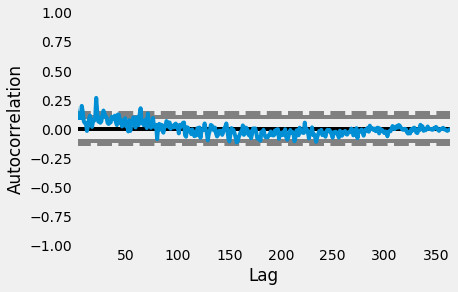

In [14]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
plt.style.use('fivethirtyeight')

autocorrelation_plot(df);

### Stationarity

#### What Is Stationarity?

 - Probably the critical assumption in a time series analysis
 - Roughly assumes the mean and variance of a time series stays the same over time
 - A Time series has to meet at least a minimum threshold of stationarity in order for the fitting process to converge towards an answer

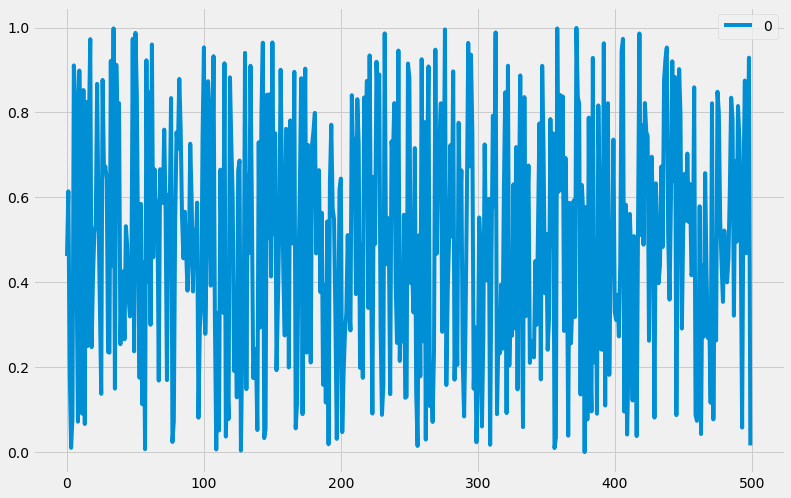

In [18]:
# we'll take a look at the ideal of a stationary time series - white noise
noise = np.random.random(500)

pd.DataFrame(noise).plot(figsize=(12, 8));

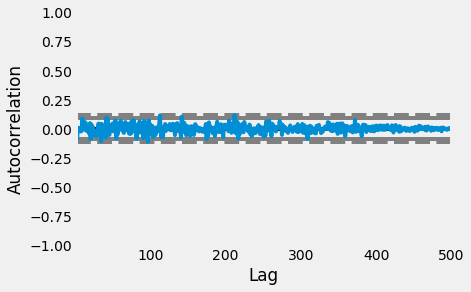

In [19]:
autocorrelation_plot(noise);

### Stationarity In An Actual Data Set -- Case Study:  The Airline Passengers Dataset

In [21]:
data = pd.read_csv('data/AirPassengers.csv', index_col='Month', parse_dates=True)

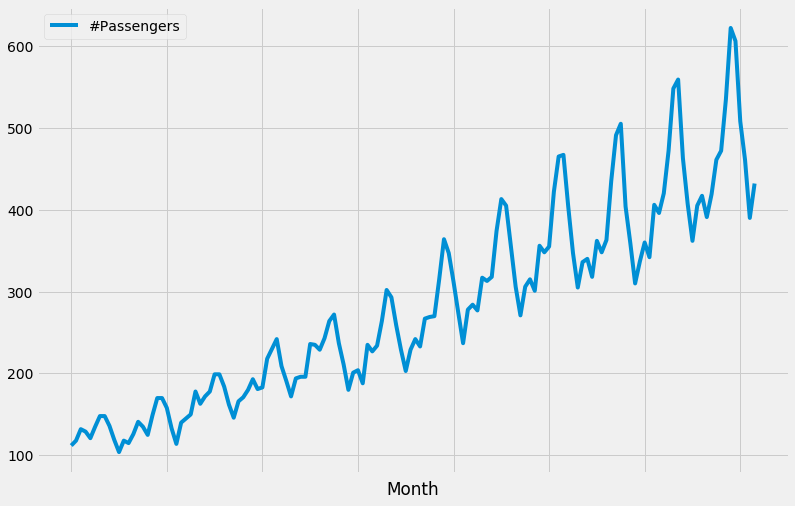

In [155]:
data.plot(figsize=(12, 8));

### Options for Creating A Stationary Time Series:

 - take the log of your data to de-noise it
 - take the difference between one data point and the next
 - perform differencing on a different lag of time to account for seasonality

### Differencing

In [332]:
data['Passengers'].head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [334]:
# pandas has a built in function to take the difference between one point and the next
data['Passengers'].diff()

Month
1949-01-01      NaN
1949-02-01      6.0
1949-03-01     14.0
1949-04-01     -3.0
1949-05-01     -8.0
1949-06-01     14.0
1949-07-01     13.0
1949-08-01      0.0
1949-09-01    -12.0
1949-10-01    -17.0
1949-11-01    -15.0
1949-12-01     14.0
1950-01-01     -3.0
1950-02-01     11.0
1950-03-01     15.0
1950-04-01     -6.0
1950-05-01    -10.0
1950-06-01     24.0
1950-07-01     21.0
1950-08-01      0.0
1950-09-01    -12.0
1950-10-01    -25.0
1950-11-01    -19.0
1950-12-01     26.0
1951-01-01      5.0
1951-02-01      5.0
1951-03-01     28.0
1951-04-01    -15.0
1951-05-01      9.0
1951-06-01      6.0
              ...  
1958-07-01     56.0
1958-08-01     14.0
1958-09-01   -101.0
1958-10-01    -45.0
1958-11-01    -49.0
1958-12-01     27.0
1959-01-01     23.0
1959-02-01    -18.0
1959-03-01     64.0
1959-04-01    -10.0
1959-05-01     24.0
1959-06-01     52.0
1959-07-01     76.0
1959-08-01     11.0
1959-09-01    -96.0
1959-10-01    -56.0
1959-11-01    -45.0
1959-12-01     43.0
1960-01-01    

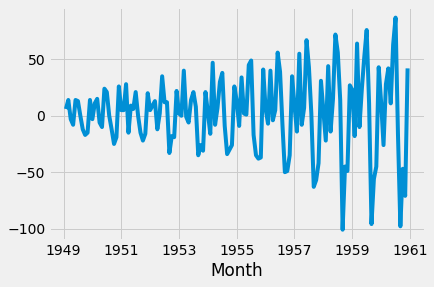

In [335]:
data['Passengers'].diff().plot();

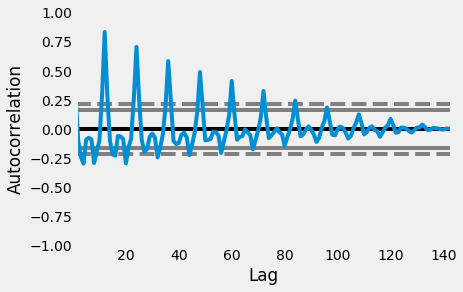

In [337]:
autocorrelation_plot(data['Passengers'].diff()[1:]);

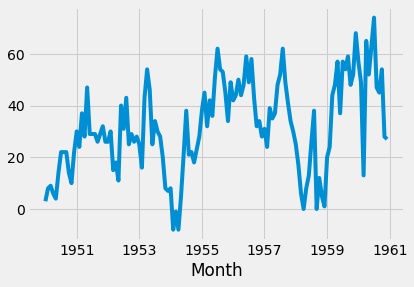

In [340]:
data['Passengers'].diff(periods=12).plot();

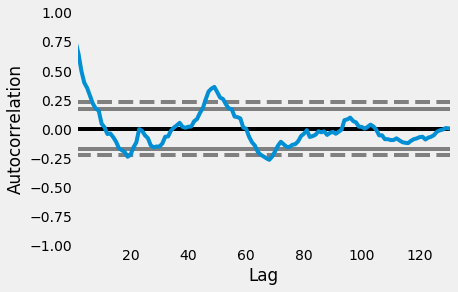

In [339]:
autocorrelation_plot(data['Passengers'].diff(periods=12)[13:]);

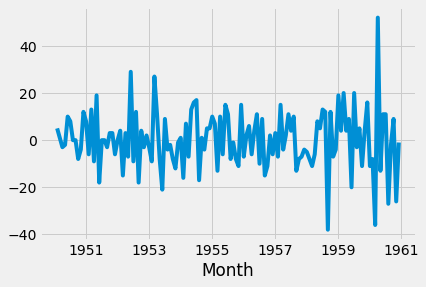

In [338]:
data['Passengers'].diff().diff(periods=12).plot();

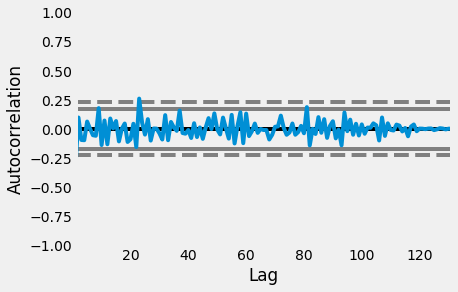

In [341]:
autocorrelation_plot(data['Passengers'].diff().diff(periods=12)[13:]);

### Differencing and Stationary Time Series

 - Differencing a time series is useful for removing the trend from a time series, but not necessarily the variance
 - If you have seasonality in your time series, you'll need to difference with respect to the number of lags between seasons
 - Taking the log of your data is useful for removing variance
 - **Log Return:** Taking the difference of log-transformed data.  Most common practice if you have no seasonality
 - The number of times you difference your data is the *d* in ARIMA(p, d, q) models
 - It's a good idea to make sure that the value of d is no more than 2

### Further Reading:

There is a test called an augmented Dickey-Fuller test, which is tests a null-hypothesis that data is not-stationary.  If its p-value is less than 0.5, then you can assume you have a stationary time series.  

If you want a more precise way to quantify way whether or not your time series is stationary, it's the most common analytical technique used.

More info about it can be found here:  https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test

Its API in Python:  https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

### Auto-Regressive and Moving Average Processes

What are AR and MA processes?

 - Two different ways to relate a value in a time series to its previous moments
 - an AR process relates a time series to its previous values
 - an MA process relates a time series to its observed level of statistical noise
 - in an ARIMA(p, d, q) model, p relates to the number of elements in the AR process
 - q relates to the number of elements in an MA process

### Auto-Regressive Processes

Have the generic definition:  

$$ Predicted \space Value = Constant + (Weight_{1}*Value_{t-1}) + (Weight_{2}*Value_{t-2}) $$

#### Some Basic Notes:

 - Denoted as an AR(p) process
 - p denotes the number of units of time you look back
 - Works a lot like linear regression
  - The random noise in your time series process works like the y-intercept
  - The previously observed values are your predictors
  
Let's take a look at our airline passengers dataset......

In [211]:
data.tail()

#Passengers
Month               
1960-08          606
1960-09          508
1960-10          461
1960-11          390
1960-12          432

### How Many Passengers Will There Be In January of 1961?

Let's assume we have an AR(2) Process, with the weight of the first value = 0.7, and the weight of the second 0.4, and a value for the noise constant set to 4.3

In [212]:
# our prediction looks like this:

prediction = 4.3 + (432*0.7) + (390*0.4)
prediction

462.7

### Thinking Out Loud.......

 - For an AR(p) process, what might we want to solve for to get the best prediction?
 - If an AR(p) process is just a linear combination of previously observed values, what kind of information might it lack, *if we limit ourselves strictly to the passing of time?*

### Moving Average Processes

 - The 'MA' in ARIMA models
 - Model how much of the results in a time-series are derived from random noise that's generated at each subsequent point
 - Denoted as an MA(q) process
 - q denotes the amount of noise terms to include within your model
 - Noise is represented by the residuals from your previous estimates

Have the general definition:

$$ Current\space Value = Constant + (Weight_{1}*Noise_{t-1}) + (Weight_{2}*Noise_{t-2}) +....+ (Weight_{n}*Noise_{t-n}) $$

### So How Many Values Do We Use For Our P and Q Terms?

 - The number to use for q is derived from your statistically significant autocorrelation lags
 - The number to use for p is derived from your statistically significant *partial* autocorrelation lags
 - These values can also be used to determine if you should include seasonal terms
 - Values for p and q are typically pretty close to one another
 - Best way to derive this is from a graphing library in statsmodels

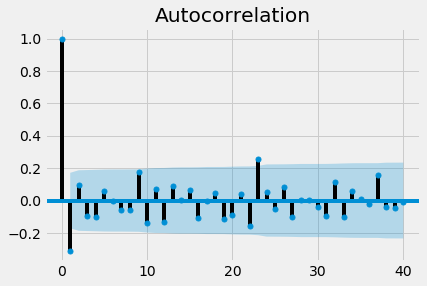

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

stationary_data = data['Passengers'].diff().diff(periods=12)[13:]
x = plot_acf(stationary_data, lags=40)

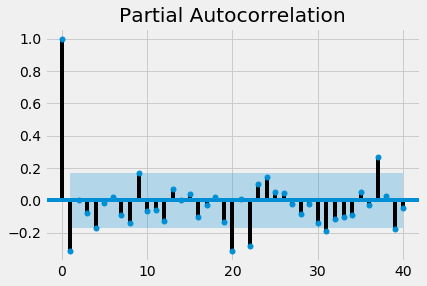

In [28]:
y = plot_pacf(stationary_data, lags=40)

### So What Do We Have Right Now?

 - a differencing term that is 1 for our sequential data, 1 for our seasonal term
 - an AR(p) term that is 1 (ignoring seasonality for now)
 - an MA(q) term that is 1
 - our initial model is ARIMA(1, 1, 1) (remember, we're not accounting for seasonality right now).
 
Let's fit our model........

In [29]:
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data['Passengers'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Wed, 21 Aug 2019   AIC                           1402.145
Time:                        16:22:07   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.Passengers  

#### To Look Into Our Results:

 - The coefficient for our Auto-Regressive term is 0.74
 - The coefficient for our moving average term is -1
 - The moving average term is the residual from our last prediction

In [378]:
# this makes a forecast for the next period in our time series
# first number is the forecast
# second number is the standard deviation of the forecast
# third number is the 95% confidence interval
results.forecast()

(array([443.49286836]),
 array([31.33795376]),
 array([[382.07160764, 504.91412907]]))

In [34]:
# you can do so for multiple periods into the future
results.forecast(steps=3)

(array([443.49286836, 452.67650116, 460.15129766]),
 array([31.33795376, 38.98523731, 42.59505294]),
 array([[382.07160764, 504.91412907],
        [376.26684011, 529.08616222],
        [376.66652799, 543.63606733]]))

In [379]:
# this is the final score of our model -- the lower the better
results.aic

1402.1453998018505

### Some Closing Thoughts on ARIMA models......

 - They can be very accurate for making a small number of predictions narrowly into the future
 - Their accuracy breaks down the further out in time you go
 - They are *forecasting* techniques moreso than ML Techniques

### Bonus Question:  How Would You Use Cross Validation on a Data Set That Might Require an ARIMA model?